In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 加载数据集
iris = load_iris()
X = iris.data  # 特征数据
y = iris.target  # 标签数据

In [8]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# 创建并拟合PCA模型
pca = PCA(n_components=4)  # 保留2个主成分
X_pca = pca.fit_transform(X_scaled)

In [14]:
# 输出解释方差比
print("解释方差比:", pca.explained_variance_ratio_)
print("累积解释方差比:", np.sum(pca.explained_variance_ratio_))

解释方差比: [0.72962445 0.22850762 0.03668922 0.00517871]
累积解释方差比: 1.0000000000000002


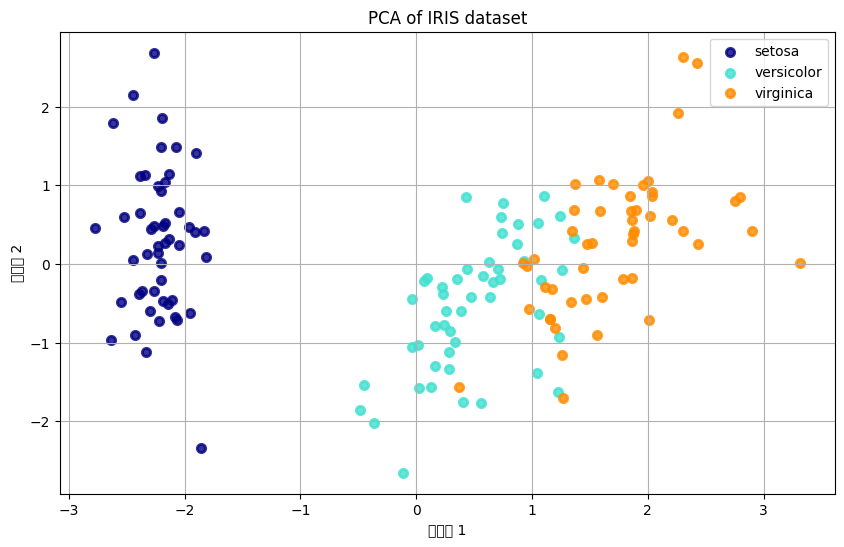

D:\PySpace\PythonMachineLearn\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32047 (\N{CJK UNIFIED IDEOGRAPH-7D2F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\PySpace\PythonMachineLearn\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 31215 (\N{CJK UNIFIED IDEOGRAPH-79EF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\PySpace\PythonMachineLearn\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35299 (\N{CJK UNIFIED IDEOGRAPH-89E3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\PySpace\PythonMachineLearn\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 37322 (\N{CJK UNIFIED IDEOGRAPH-91CA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\PySpace\PythonMachineLearn\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26041 (\N{CJK U

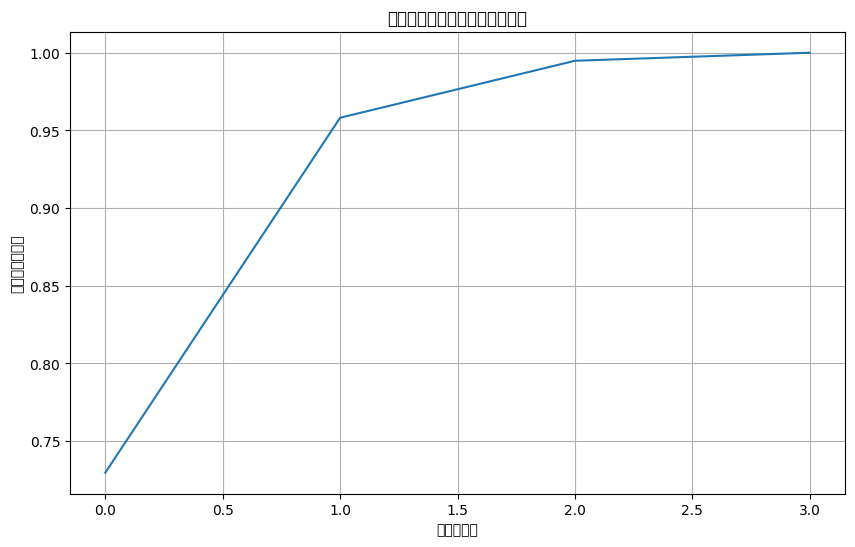

In [19]:
# 可视化降维结果
plt.figure(figsize=(10, 6))
target_names = iris.target_names
colors = ['navy', 'turquoise', 'darkorange']

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=.8, lw=2,
                label=target_name)

plt.title('PCA of IRIS dataset')
plt.xlabel('主成分 1')
plt.ylabel('主成分 2')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.grid(True)
plt.show()

# 探索不同主成分数量的效果
plt.figure(figsize=(10, 6))
pca_full = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel('主成分数量')
plt.ylabel('累积解释方差比')
plt.title('主成分数量与解释方差比的关系')
plt.grid(True)
plt.show()    